In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
mall_customers_info = pd.read_csv ("Mall_Customers.csv")
mall_customers_info.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall_customers_info.shape


(200, 5)

In [4]:
mall_customers_info.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
mall_customers_info.describe()  

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
mall_customers_info.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
mall_customers_info.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

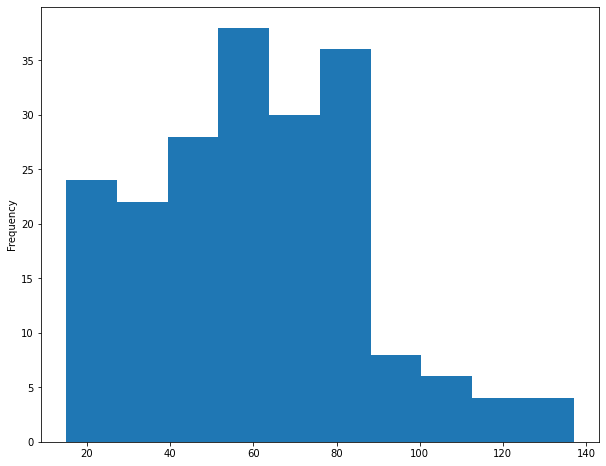

In [18]:
mall_customers_info['Annual Income (k$)'].plot.hist(bins=10, figsize=(10,8));

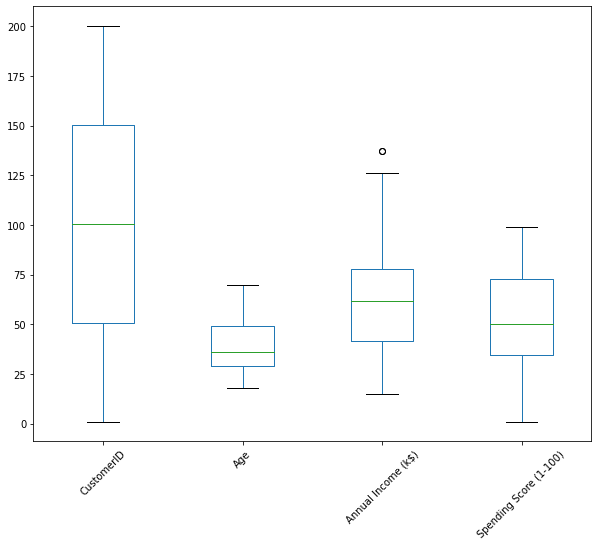

In [19]:
boxplot = mall_customers_info.boxplot(grid= False, rot=45 , figsize=(10,8));

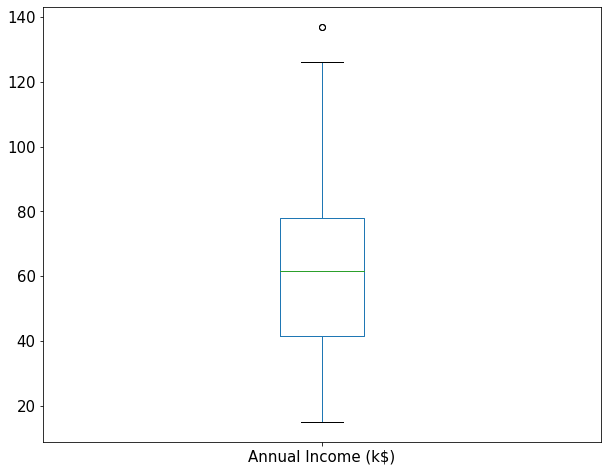

In [24]:
boxplot = mall_customers_info.boxplot(grid= False, fontsize=15,column=['Annual Income (k$)'], figsize=(10,8));

In [25]:
mall_customers_info.loc[mall_customers_info['Annual Income (k$)']>125]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [26]:
q1 = mall_customers_info['Annual Income (k$)'].quantile(0.25)
q3 = mall_customers_info['Annual Income (k$)'].quantile(0.75)

In [27]:
print(q1,q3)

41.5 78.0


In [28]:
IQR=q3-q1

In [29]:
print(IQR)

36.5


In [30]:
minimum= q1-1.5*IQR
maximum= q3+1.5*IQR

In [31]:
minimum


-13.25

In [32]:
maximum

132.75

In [33]:
mall_customers_info['Annual Income (k$)_outliers'] =False

In [36]:
for index, row in mall_customers_info.iterrows():
    if row ['Annual Income (k$)'] > maximum:
        mall_customers_info.at[index,'Annual Income (k$)_outliers']=True

In [37]:
mall_customers_info['Annual Income (k$)_outliers'].sum()

2

In [38]:
mean =mall_customers_info['Annual Income (k$)'].mean()
mean

60.56

In [39]:
for index , row in mall_customers_info.iterrows():
    if row['Annual Income (k$)_outliers']== True :
        mall_customers_info.at[index,'Annual Income (k$)_outliers']=mean

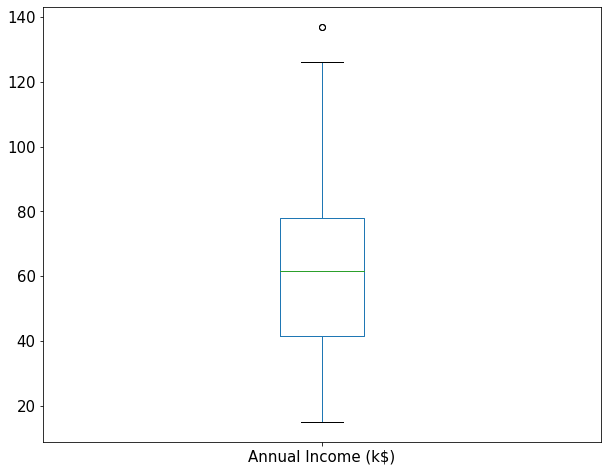

In [40]:
boxplot = mall_customers_info.boxplot(grid= False, fontsize=15,column=['Annual Income (k$)'], figsize=(10,8));